<a href="https://colab.research.google.com/github/TheMathAI/MATH208_PROJECT/blob/main/MATH_208_Project_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("ggpubr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’




In [ ]:
# library
library(tidyverse)
library(ggplot2)
library(ggpubr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# taking data from github to a dataframe
cpu_gpu_data <- read.csv("https://raw.githubusercontent.com/TheMathAI/MATH208_PROJECT/main/chip_dataset.csv")

In [ ]:
# replacing columns names to get initial columns names
colnames(cpu_gpu_data) <- c('ID', 'Product', 'Type', 'Release_Date', 'Process_Size_(nm)', 'TDP_(W)', 'Die_Size_(mm_square)', 'Transistors_(million)', 'Freq_(MHz)', 'Foundry', 'Vendor', 'FP16_GFLOPS', 'FP32_GFLOPS', 'FP64_GFLOPD')

In [ ]:
head(cpu_gpu_data)

,ID,Product,Type,Release_Date,Process_Size_(nm),TDP_(W),Die_Size_(mm_square),Transistors_(million),Freq_(MHz),Foundry,Vendor,FP16_GFLOPS,FP32_GFLOPS,FP64_GFLOPD
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,0,AMD Athlon 64 3500+,CPU,2007-02-20,65,45,77,122,2200,Unknown,AMD,NA,NA,NA
2,1,AMD Athlon 200GE,CPU,2018-09-06,14,35,192,4800,3200,Unknown,AMD,NA,NA,NA
3,2,Intel Core i5-1145G7,CPU,2020-09-02,10,28,NA,NA,2600,Intel,Intel,NA,NA,NA
4,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22,80,160,1400,1800,Intel,Intel,NA,NA,NA
5,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45,125,258,758,3700,Unknown,AMD,NA,NA,NA
6,5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22,95,160,1400,2400,Intel,Intel,NA,NA,NA


In [ ]:
# remove all rows with NA values between the column 5 and 9 inclunding 5,9.
cpu_gpu_data_no_NA <- cpu_gpu_data[complete.cases(cpu_gpu_data[ , 5:9]),]

In [ ]:
# Count by group (CPU and GPU) with proportion
cpu_gpu_data_count <- cpu_gpu_data_no_NA %>% group_by(Type) %>% summarise(count=n()) %>%
 mutate(prop=count/sum(count)) %>% arrange(desc(count))

cpu_gpu_data_count

Type,count,prop
<chr>,<int>,<dbl>
GPU,1879,0.5490941
CPU,1543,0.4509059


In [ ]:
# It contains min, max, mean, median, sd, IQR, Q1 and Q3. Feel free to add 
#other functions that would give us more information on the data
summary_cpu_gpu <- cpu_gpu_data_no_NA %>% group_by(Type) %>% select(Type, 'Process_Size_(nm)', 'TDP_(W)', 'Die_Size_(mm_square)', 'Transistors_(million)', 'Freq_(MHz)') %>%
  summarise_all(list(Min=min, Max=max,Avg=mean, Med=median, Sd=sd, iqr=IQR, Q1=~quantile(.,probs=0.25), Q3=~quantile(.,probs=0.75))) %>% 
  pivot_longer(cols=starts_with(c('Process','TDP','Die','Transistors','Freq')), names_to = "Measure", values_drop_na = TRUE)

In [ ]:
# pivoting wider to compare more easily the difference between CPU and GPU
summary_cpu_gpu_wide <- summary_cpu_gpu %>% pivot_wider(names_from = Type, values_from = value)

# Q1

## a)

**Process Size**

Measure,CPU,GPU
<chr>,<dbl>,<dbl>
Process_Size_(nm)_Min,7.00000,7.00000
Process_Size_(nm)_Max,180.00000,250.00000
Process_Size_(nm)_Avg,60.47699,46.94838
Process_Size_(nm)_Med,45.00000,40.00000
Process_Size_(nm)_Sd,42.99468,38.51769
Process_Size_(nm)_iqr,58.00000,27.00000
Process_Size_(nm)_Q1,32.00000,28.00000
Process_Size_(nm)_Q3,90.00000,55.00000


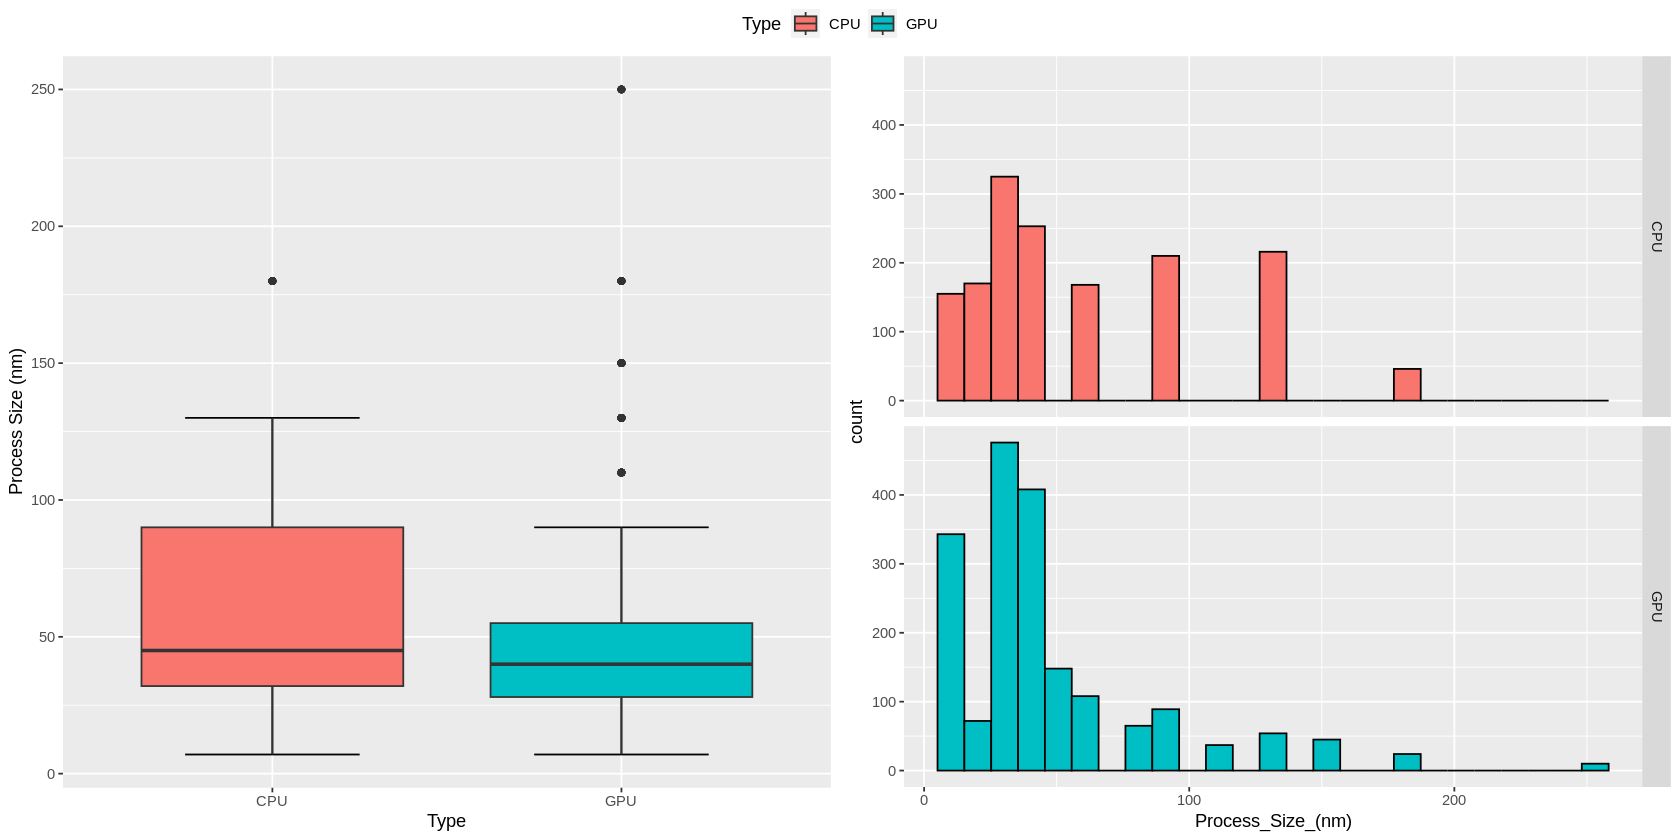

In [ ]:
# Plot for Process_Size

# boxplot
box1 <- ggplot(cpu_gpu_data_no_NA,aes(x=Type,y=`Process_Size_(nm)`,fill=Type)) +
stat_boxplot(geom="errorbar",width=0.5) + geom_boxplot() +
ylab("Process Size (nm)")
# histogram
hist1 <- ggplot(cpu_gpu_data_no_NA, aes(x=`Process_Size_(nm)`,group=Type,fill=Type)) +
geom_histogram(bins=25,col="black") +
facet_grid(rows=vars(Type))
# changing size of figure print
options(repr.plot.width=14, repr.plot.height=7)
# 2 plots in same figure
ggarrange(box1,hist1, nrow = 1, common.legend = TRUE)

# printing table with numerical values
summary_cpu_gpu_wide %>% filter(str_detect(Measure, "Process"))

The distribution between CPU's GPU's for Process Size is not the same. Even though they share a median that is close from one another, the distribution for GPU's contains more outliers and is skew to the right. Also, the spread is more significant for the CPU.

**TDP (W)**

Measure,CPU,GPU
<chr>,<dbl>,<dbl>
TDP_(W)_Min,1.00000,2.00000
TDP_(W)_Max,300.00000,900.00000
TDP_(W)_Avg,73.43422,92.20436
TDP_(W)_Med,65.00000,55.00000
TDP_(W)_Sd,47.64056,96.20399
TDP_(W)_iqr,58.00000,95.00000
TDP_(W)_Q1,37.00000,30.00000
TDP_(W)_Q3,95.00000,125.00000


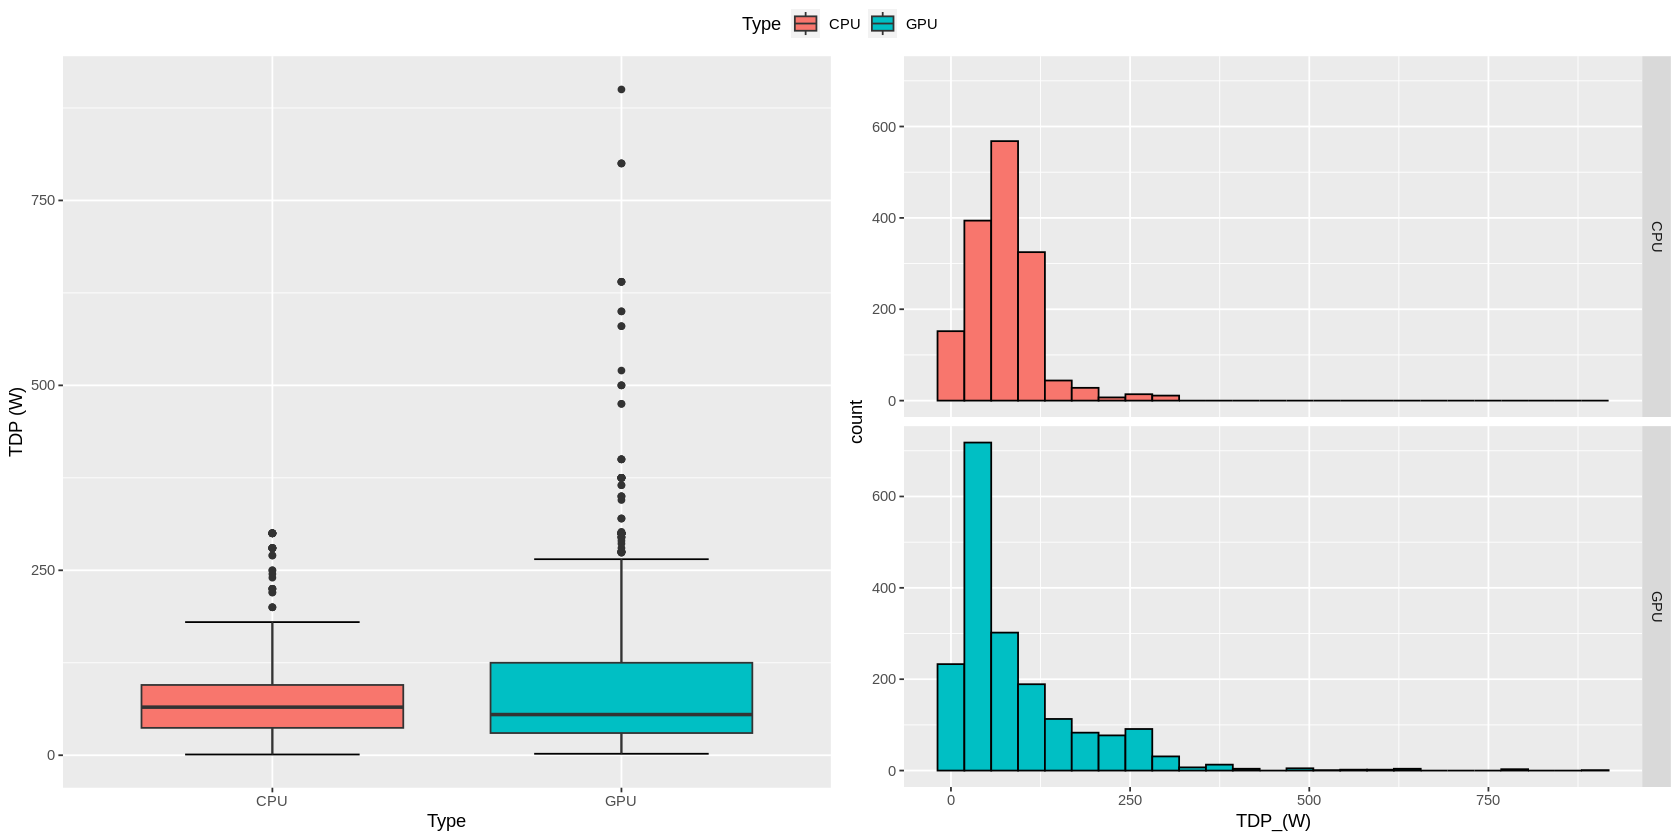

In [ ]:
# Plot for TDP_(W)

# boxplot
box1 <- ggplot(cpu_gpu_data_no_NA,aes(x=Type,y=`TDP_(W)`,fill=Type)) +
stat_boxplot(geom="errorbar",width=0.5) + geom_boxplot() +
ylab("TDP (W)")
# histogram
hist1 <- ggplot(cpu_gpu_data_no_NA, aes(x=`TDP_(W)`,group=Type,fill=Type)) +
geom_histogram(bins=25,col="black") +
facet_grid(rows=vars(Type))
# changing size of figure print
options(repr.plot.width=14, repr.plot.height=7)
# 2 plots in same figure
ggarrange(box1,hist1, nrow = 1, common.legend = TRUE)

# printing table with numerical values
summary_cpu_gpu_wide %>% filter(str_detect(Measure, "TDP_"))

Both distributions are skew to the right, but the GPU's contains a lot more outliers and it has a bigger spread which can be seen in the plots and by the standard deivation.

**Die Size (mm^2)**

Measure,CPU,GPU
<chr>,<dbl>,<dbl>
Die_Size_(mm_square)_Min,1.00000,56.0000
Die_Size_(mm_square)_Max,684.00000,826.0000
Die_Size_(mm_square)_Avg,169.55023,225.0117
Die_Size_(mm_square)_Med,156.00000,169.0000
Die_Size_(mm_square)_Sd,80.76499,156.2681
Die_Size_(mm_square)_iqr,111.00000,178.0000
Die_Size_(mm_square)_Q1,109.00000,116.0000
Die_Size_(mm_square)_Q3,220.00000,294.0000


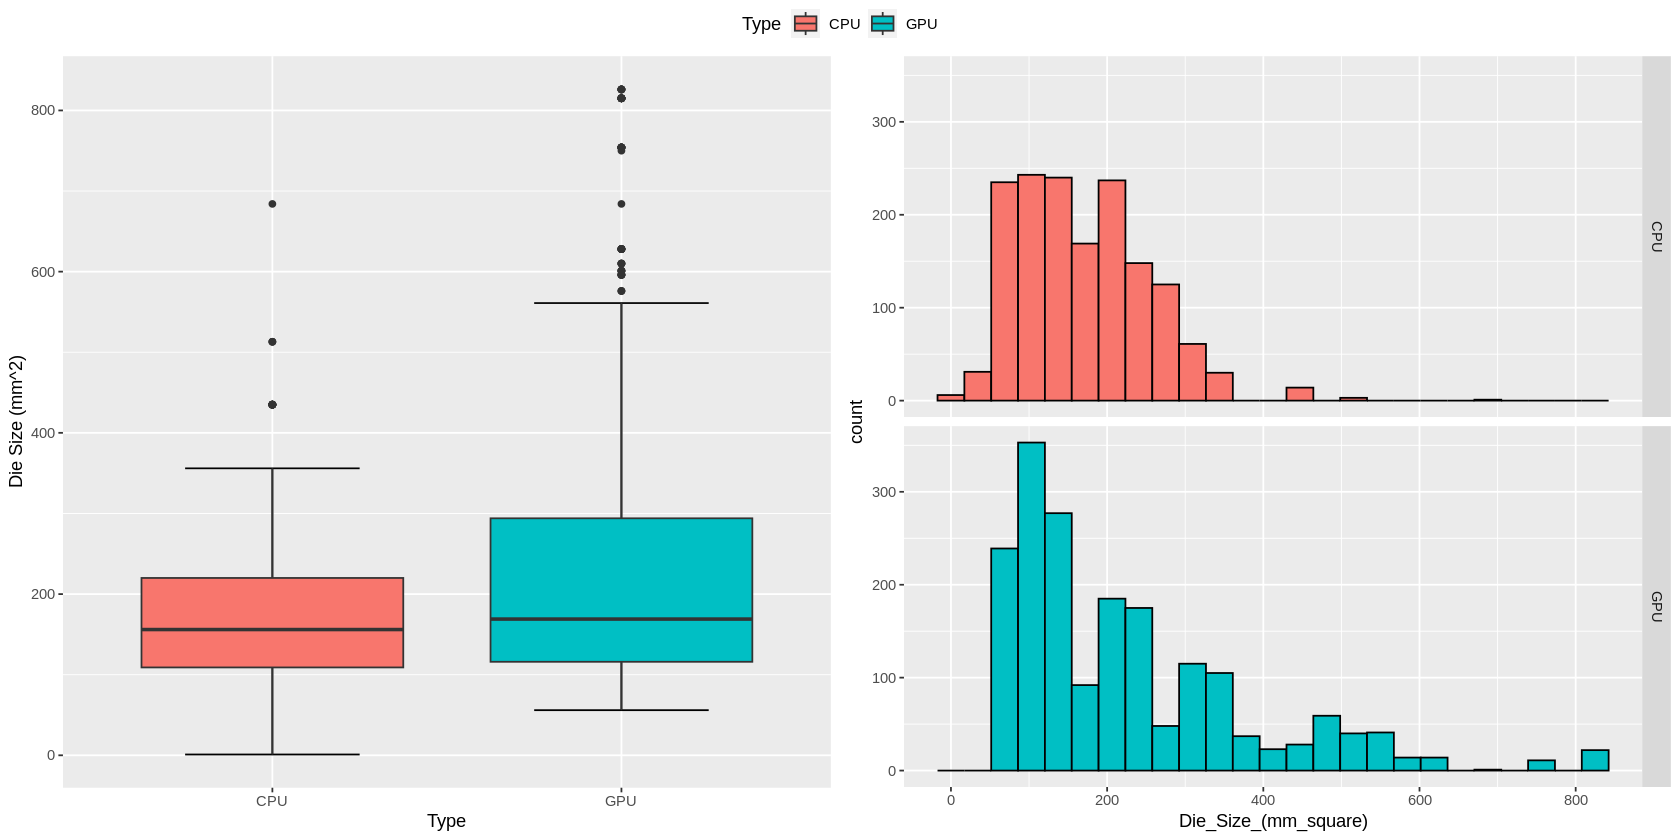

In [ ]:
# Plot for Die_Size_(mm_square)

# boxplot
box1 <- ggplot(cpu_gpu_data_no_NA,aes(x=Type,y=`Die_Size_(mm_square)`,fill=Type)) +
stat_boxplot(geom="errorbar",width=0.5) + geom_boxplot() +
ylab("Die Size (mm^2)")
# histogram
hist1 <- ggplot(cpu_gpu_data_no_NA, aes(x=`Die_Size_(mm_square)`,group=Type,fill=Type)) +
geom_histogram(bins=25,col="black") +
facet_grid(rows=vars(Type))
# changing size of figure print
options(repr.plot.width=14, repr.plot.height=7)
# 2 plots in same figure
ggarrange(box1,hist1, nrow = 1, common.legend = TRUE)

# printing table with numerical values
summary_cpu_gpu_wide %>% filter(str_detect(Measure, "Die_Size"))

For the Die Size (mm^2), CPU'S are concentratred all in the same range, and by analysing the histogram it is possible to distinguish a similarity with a plateau distribution. For the GPU's it is right skewed with again more outliers and a larger spread.

**Transistors (million)**

Measure,CPU,GPU
<chr>,<dbl>,<dbl>
Transistors_(million)_Min,37.000,10.000
Transistors_(million)_Max,19200.000,54200.000
Transistors_(million)_Avg,1088.541,3045.864
Transistors_(million)_Med,450.000,1170.000
Transistors_(million)_Sd,1875.182,5426.407
Transistors_(million)_iqr,1075.000,3226.000
Transistors_(million)_Q1,125.000,314.000
Transistors_(million)_Q3,1200.000,3540.000


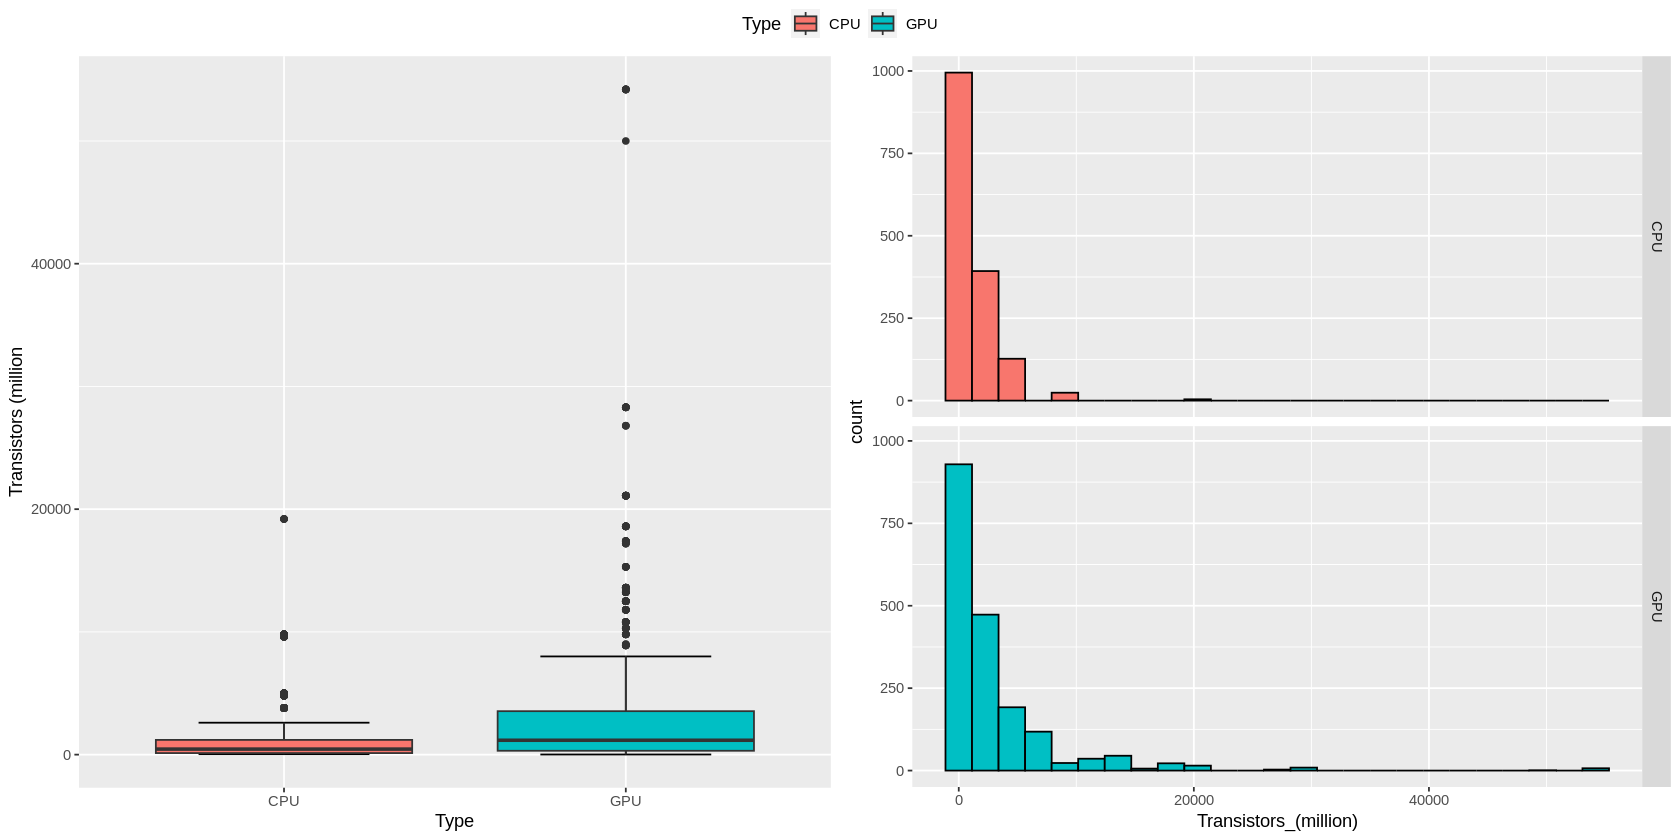

In [ ]:
# Plot for Transistors_(million)

# boxplot
box1 <- ggplot(cpu_gpu_data_no_NA,aes(x=Type,y=`Transistors_(million)`,fill=Type)) +
stat_boxplot(geom="errorbar",width=0.5) + geom_boxplot() +
ylab("Transistors (million")
# histogram
hist1 <- ggplot(cpu_gpu_data_no_NA, aes(x=`Transistors_(million)`,group=Type,fill=Type)) +
geom_histogram(bins=25,col="black") +
facet_grid(rows=vars(Type))
# changing size of figure print
options(repr.plot.width=14, repr.plot.height=7)
# 2 plots in same figure
ggarrange(box1,hist1, nrow = 1, common.legend = TRUE)

# printing table with numerical values
summary_cpu_gpu_wide %>% filter(str_detect(Measure, "Transistors"))

Both distribution are right skewed, but the GPU's have more outliers and a bigger spread. Base on the histogram for CPU's they tend to have only three different range for the transistors.

**Freq (MHz)**

Measure,CPU,GPU
<chr>,<dbl>,<dbl>
Freq_(MHz)_Min,600.0000,100.0000
Freq_(MHz)_Max,4700.0000,2321.0000
Freq_(MHz)_Avg,2447.3590,736.5514
Freq_(MHz)_Med,2400.0000,675.0000
Freq_(MHz)_Sd,737.0142,319.3451
Freq_(MHz)_iqr,1100.0000,412.0000
Freq_(MHz)_Q1,1900.0000,513.0000
Freq_(MHz)_Q3,3000.0000,925.0000


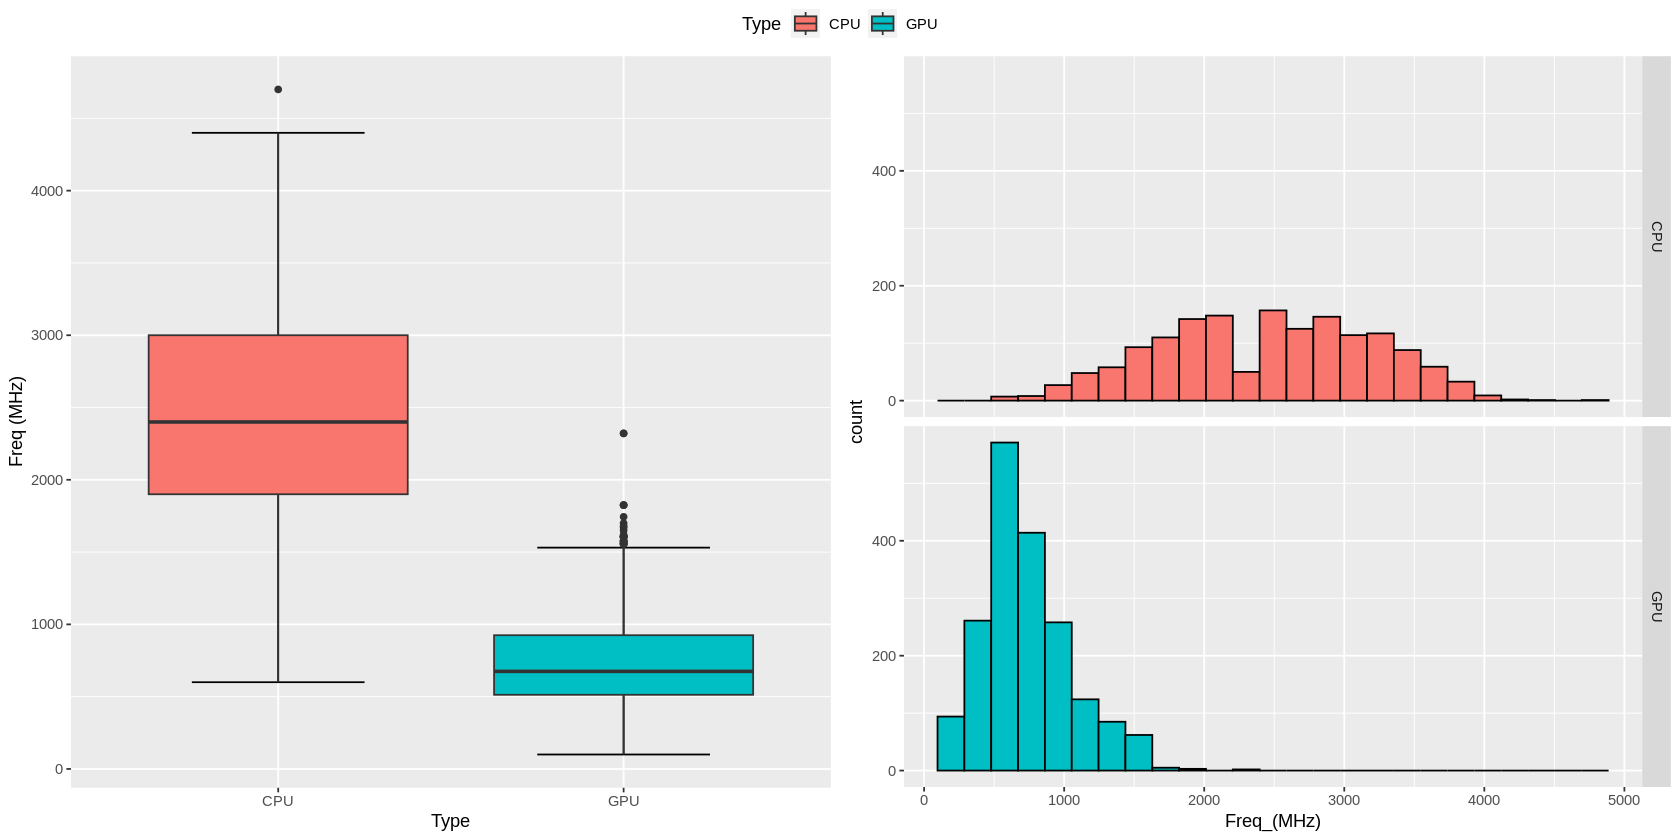

In [ ]:
# Plot for Freq_(MHz)

# boxplot
box1 <- ggplot(cpu_gpu_data_no_NA,aes(x=Type,y=`Freq_(MHz)`,fill=Type)) +
stat_boxplot(geom="errorbar",width=0.5) + geom_boxplot() +
ylab("Freq (MHz)")
# histogram
hist1 <- ggplot(cpu_gpu_data_no_NA, aes(x=`Freq_(MHz)`,group=Type,fill=Type)) +
geom_histogram(bins=25,col="black") +
facet_grid(rows=vars(Type))
# changing size of figure print
options(repr.plot.width=14, repr.plot.height=7)
# 2 plots in same figure
ggarrange(box1,hist1, nrow = 1, common.legend = TRUE)

# printing table with numerical values
summary_cpu_gpu_wide %>% filter(str_detect(Measure, "Freq"))

CPU's distribution look like a normal distrubtion for the most part and as a larger spread than gpu's for the fequence. GPU's have a distribution skew to the right and also have more outliers.

## b)

In [ ]:
# removing NA values from column Foundry and Vendor
cpu_gpu_data_no_NA_b <- cpu_gpu_data[complete.cases(cpu_gpu_data[ , 10:11]),]

In [ ]:
summary_cpu_gpu_foundry <- cpu_gpu_data_no_NA_b %>% group_by(Type, Foundry) %>% summarise(count_f=n())
summary_cpu_gpu_vendor <- cpu_gpu_data_no_NA_b %>% group_by(Type, Vendor) %>% summarise(count_v=n())
summary_cpu_gpu_foundry %>% merge(summary_cpu_gpu_vendor, by = 'Type')

`summarise()` has grouped output by 'Type'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Type'. You can override using the
`.groups` argument.


Type,Foundry,count_f,Vendor,count_v
<chr>,<chr>,<int>,<chr>,<int>
CPU,GF,93,AMD,950
CPU,GF,93,Intel,1242
CPU,Intel,1242,AMD,950
CPU,Intel,1242,Intel,1242
CPU,TSMC,97,AMD,950
CPU,TSMC,97,Intel,1242
CPU,Unknown,760,AMD,950
CPU,Unknown,760,Intel,1242
GPU,GF,172,AMD,712


In [ ]:
# where CPU and GPU come from by vendors and foundries
foundry <- ggplot(cpu_gpu_data_no_NA_b,aes(x=Foundry,fill=Vendor)) +
 geom_bar() + scale_fill_viridis_d() +
 ylab("Foundry")

vendor <- ggplot(cpu_gpu_data_no_NA_b,aes(x=Vendor,fill=Foundry)) +
 geom_bar() + scale_fill_viridis_d() +
 ylab("Vendor")

# check by type (CPU and GPU) where it comes from
foundry_type <- ggplot(cpu_gpu_data_no_NA_b,aes(x=Foundry,fill=Type)) +
 geom_bar() + scale_fill_viridis_d() +
 ylab("Foundry")

vendor_type <- ggplot(cpu_gpu_data_no_NA_b,aes(x=Vendor,fill=Type)) +
 geom_bar() + scale_fill_viridis_d() +
 ylab("Vendor")

# changing size of figure print
options(repr.plot.width=14, repr.plot.height=9)

In [ ]:
# table where cpu and gpu comes from, but I need to join both tables together. Don't know how, need to figure out
summary_cpu_gpu_foundry
summary_cpu_gpu_vendor
summary_cpu_gpu_foundry$ID <- seq.int(nrow(summary_cpu_gpu_foundry))
summary_cpu_gpu_vendor$ID <- seq.int(nrow(summary_cpu_gpu_vendor))
merge(summary_cpu_gpu_foundry, summary_cpu_gpu_vendor, by = 'ID', all = TRUE)


Type,Foundry,count_f
<chr>,<chr>,<int>
CPU,GF,93
CPU,Intel,1242
CPU,TSMC,97
CPU,Unknown,760
GPU,GF,172
GPU,IBM,3
GPU,Intel,148
GPU,NEC,2
GPU,Renesas,1


Type,Vendor,count_v
<chr>,<chr>,<int>
CPU,AMD,950
CPU,Intel,1242
GPU,AMD,712
GPU,ATI,535
GPU,Intel,150
GPU,NVIDIA,1201
GPU,Other,64


ID,Type.x,Foundry,count_f,Type.y,Vendor,count_v
<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,CPU,GF,93,CPU,AMD,950
2,CPU,Intel,1242,CPU,Intel,1242
3,CPU,TSMC,97,GPU,AMD,712
4,CPU,Unknown,760,GPU,ATI,535
5,GPU,GF,172,GPU,Intel,150
6,GPU,IBM,3,GPU,NVIDIA,1201
7,GPU,Intel,148,GPU,Other,64
8,GPU,NEC,2,NA,NA,NA
9,GPU,Renesas,1,NA,NA,NA


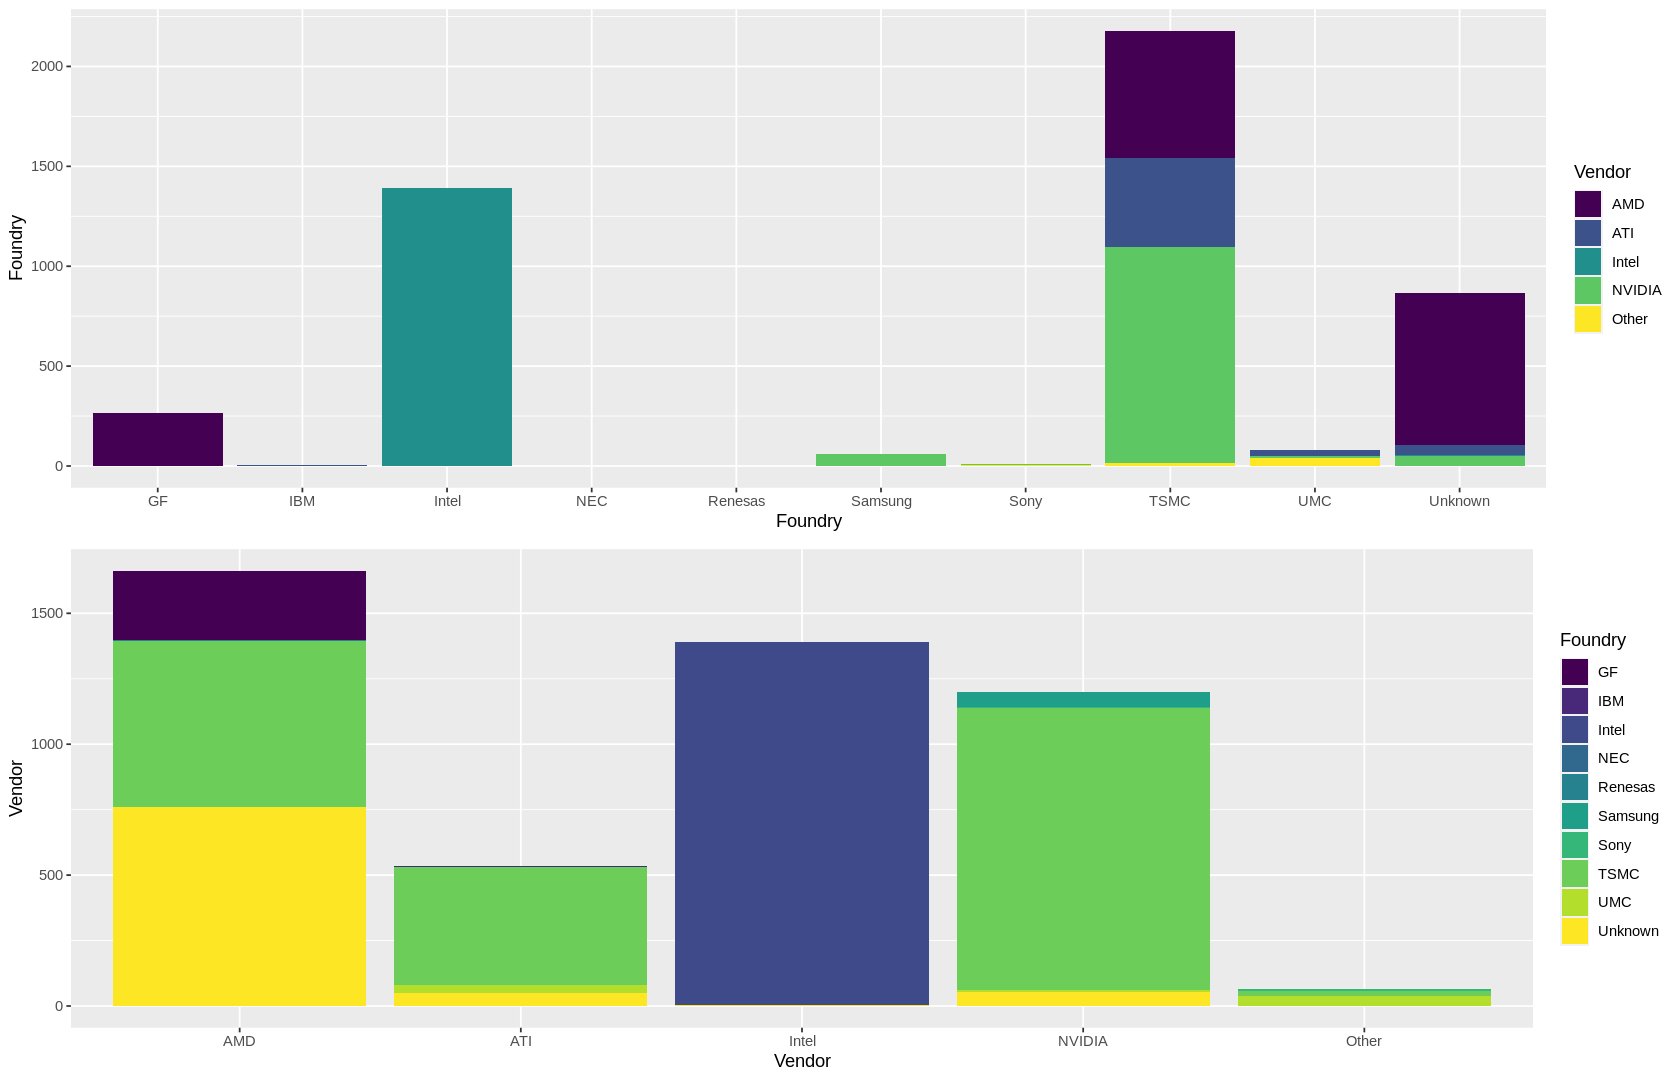

In [ ]:
# where CPU and GPU come from by vendors and foundries
ggarrange(foundry,vendor, nrow = 2)

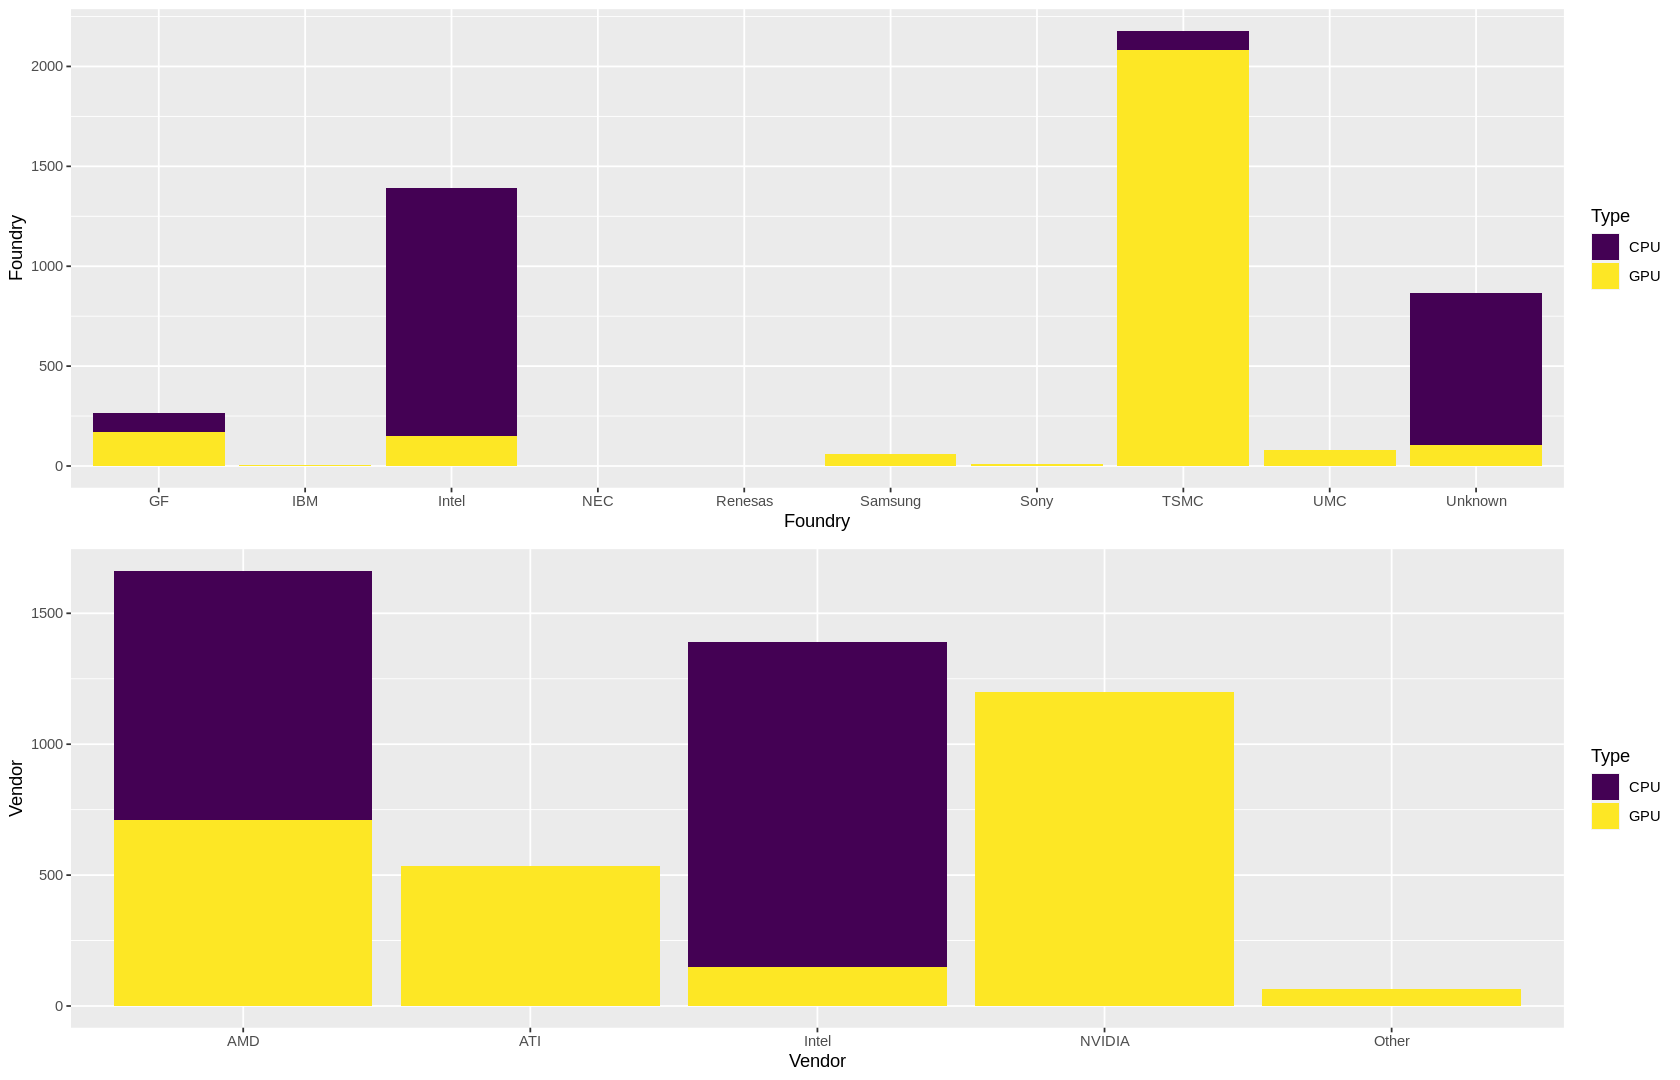

In [ ]:
# check by type (CPU and GPU) where it comes from
ggarrange(foundry_type,vendor_type, nrow = 2)

## c)

In [1]:
library(tidyverse)
library(ggplot2)
#Load


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



ERROR: ignored

In [2]:
cpu_gpu_data <- read.csv("https://raw.githubusercontent.com/TheMathAI/MATH208_PROJECT/main/chip_dataset.csv")
colnames(cpu_gpu_data) <- c('ID', 'Product', 'Type', 'Release_Date', 'Process_Size_(nm)', 'TDP_(W)', 'Die_Size_(mm_square)', 'Transistors_(million)', 'Freq_(MHz)', 'Foundry', 'Vendor', 'FP16_GFLOPS', 'FP32_GFLOPS', 'FP64_GFLOPD')
head(cpu_gpu_data)

,ID,Product,Type,Release_Date,Process_Size_(nm),TDP_(W),Die_Size_(mm_square),Transistors_(million),Freq_(MHz),Foundry,Vendor,FP16_GFLOPS,FP32_GFLOPS,FP64_GFLOPD
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,0,AMD Athlon 64 3500+,CPU,2007-02-20,65,45,77,122,2200,Unknown,AMD,NA,NA,NA
2,1,AMD Athlon 200GE,CPU,2018-09-06,14,35,192,4800,3200,Unknown,AMD,NA,NA,NA
3,2,Intel Core i5-1145G7,CPU,2020-09-02,10,28,NA,NA,2600,Intel,Intel,NA,NA,NA
4,3,Intel Xeon E5-2603 v2,CPU,2013-09-01,22,80,160,1400,1800,Intel,Intel,NA,NA,NA
5,4,AMD Phenom II X4 980 BE,CPU,2011-05-03,45,125,258,758,3700,Unknown,AMD,NA,NA,NA
6,5,Intel Xeon E5-2470 v2,CPU,2013-09-01,22,95,160,1400,2400,Intel,Intel,NA,NA,NA


In [3]:
#We fit our variables into linear model to check for dependence
LM <- lm(`Die_Size_(mm_square)` ~ `TDP_(W)` * Type, data =cpu_gpu_data, na.action = na.exclude)


In [5]:
summary(LM)
#Here our p value is evidently less than 0.05 hence we can accept the null hypothesis.(Significant)




Call:
lm(formula = `Die_Size_(mm_square)` ~ `TDP_(W)` * Type, data = cpu_gpu_data, 
    na.action = na.exclude)

Residuals:
    Min      1Q  Median      3Q     Max 
-654.22  -57.36  -15.92   48.59  514.95 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       117.45751    4.08035  28.786   <2e-16 ***
`TDP_(W)`           0.69196    0.04787  14.454   <2e-16 ***
TypeGPU            -2.19767    5.02174  -0.438    0.662    
`TDP_(W)`:TypeGPU   0.49466    0.05269   9.389   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 92.32 on 3564 degrees of freedom
  (1286 observations deleted due to missingness)
Multiple R-squared:  0.4931,	Adjusted R-squared:  0.4927 
F-statistic:  1156 on 3 and 3564 DF,  p-value: < 2.2e-16


Warning message:
“Removed 1286 rows containing missing values (`geom_point()`).”


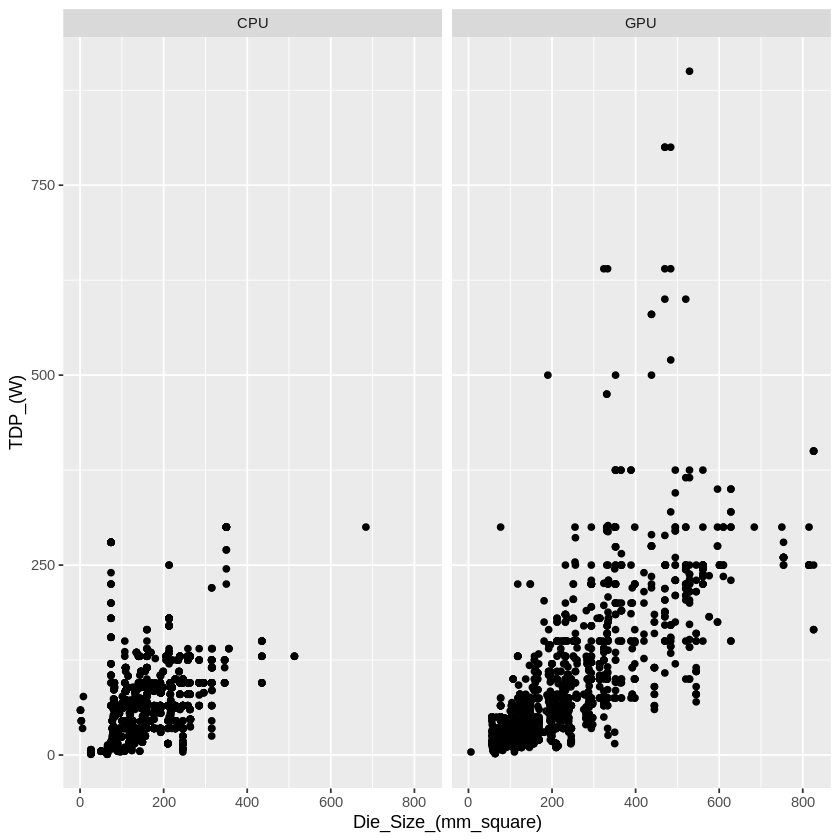

In [6]:
#Graphical representation.(Scatter)
ggplot(cpu_gpu_data, aes(x =`Die_Size_(mm_square)`, y = `TDP_(W)`)) +
  geom_point() +
  facet_wrap(~ Type)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1286 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 1286 rows containing missing values (`geom_point()`).”


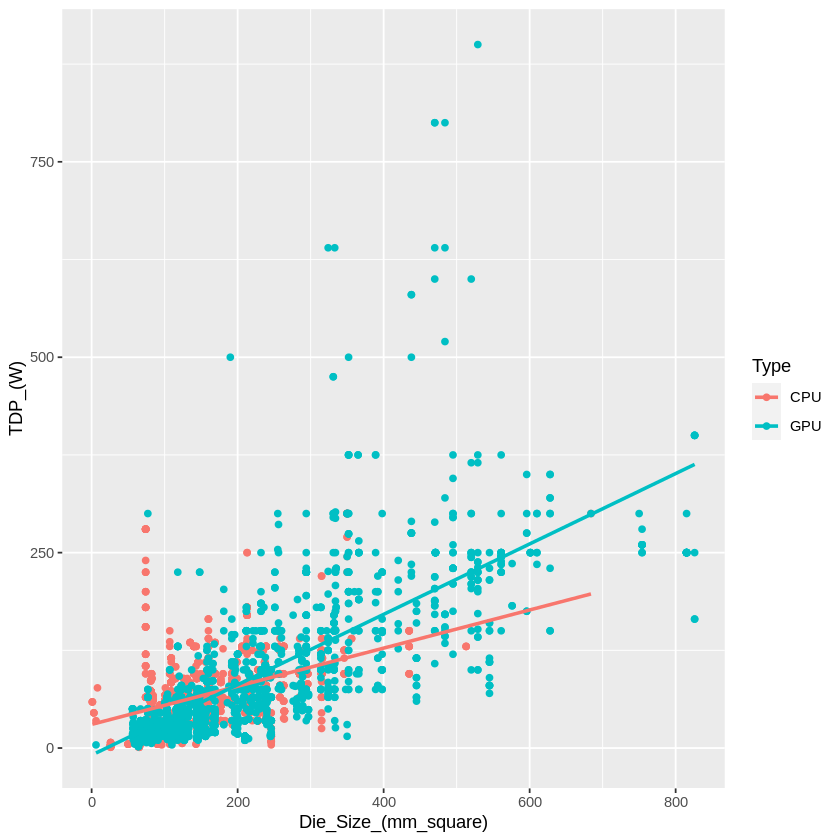

In [7]:
model <- lm(`Die_Size_(mm_square)` ~ `TDP_(W)` + Type, data = cpu_gpu_data)

# A plot with the linear regression line
ggplot(cpu_gpu_data, aes(x =`Die_Size_(mm_square)` , y = `TDP_(W)`, color = Type)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

# Q2

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘Rcpp’, ‘corrplot’, ‘car’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Warning message in file(file, "rt"):
“URL 'https://raw.githubusercontent.com/TheMathAI/MATH208_PROJECT/ma
in/chip_dataset.csv': status was 'URL using bad/illegal format or missing URL'”


ERROR: ignored